In [38]:
import pandas as pd
from NegativeClassOptimization import datasets
import seaborn as sns
import NegativeClassOptimization.config as config
import matplotlib.pyplot as plt

In [39]:
perf_df = pd.read_csv('../data/openset_performance.tsv', sep='\t')


In [40]:
perf_df.head()

,task_1,task_2,acc,recall,precision,f1
0,ONE_VS_NINE__3VRL__auto__0__42,ONE_VS_NINE__3VRL__auto__0__42,0.972986,0.975,0.971116,0.973054
1,ONE_VS_NINE__3VRL__auto__0__42,HIGH_VS_95LOW__3VRL__auto__0__42,0.987000,0.975,0.998975,0.986842
2,ONE_VS_NINE__3VRL__auto__0__42,HIGH_VS_LOOSER__3VRL__auto__0__42,0.882900,0.975,0.823341,0.892775
3,HIGH_VS_95LOW__3VRL__auto__0__42,ONE_VS_NINE__3VRL__auto__0__42,0.912356,0.998,0.852117,0.919307
4,HIGH_VS_95LOW__3VRL__auto__0__42,HIGH_VS_95LOW__3VRL__auto__0__42,0.996600,0.998,0.995213,0.996605


In [41]:
#filter = perf_df.task_1.apply(lambda x: x.split('__')[0] == 'ONE_VS_NINE')

In [42]:
#one_nine_task = perf_df[filter]

In [6]:
#closed_perf_filter = perf_df.task_2.apply(lambda x: x.split('__')[0] == 'ONE_VS_NINE')

In [7]:
#closed_one_nine = one_nine_task[closed_perf_filter]

/var/folders/ww/bptfq9n12_jbyy78qcjp7s4c0000gn/T/ipykernel_7138/617760274.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  closed_one_nine = one_nine_task[closed_perf_filter]


In [8]:
#vrl = closed_one_nine.task_2.apply(lambda x: x.split('__')[1] == '3VRL')

In [9]:
#closed_one_nine[vrl]

,task_1,task_2,acc,recall,precision,f1
0,ONE_VS_NINE__3VRL__auto__0__42,ONE_VS_NINE__3VRL__auto__0__42,0.972986,0.9750,0.971116,0.973054
9,ONE_VS_NINE__3VRL__auto__1__42,ONE_VS_NINE__3VRL__auto__1__42,0.972686,0.9782,0.967557,0.972849
18,ONE_VS_NINE__3VRL__auto__2__42,ONE_VS_NINE__3VRL__auto__2__42,0.974287,0.9806,0.968398,0.974461
27,ONE_VS_NINE__3VRL__auto__3__42,ONE_VS_NINE__3VRL__auto__3__42,0.972586,0.9810,0.964792,0.972828
36,ONE_VS_NINE__3VRL__auto__0__0,ONE_VS_NINE__3VRL__auto__0__0,0.975788,0.9798,0.972024,0.975896
45,ONE_VS_NINE__3VRL__auto__0__1,ONE_VS_NINE__3VRL__auto__0__1,0.973487,0.9764,0.970770,0.973577
54,ONE_VS_NINE__3VRL__auto__0__2,ONE_VS_NINE__3VRL__auto__0__2,0.974187,0.9758,0.972687,0.974241
63,ONE_VS_NINE__3VRL__auto__0__3,ONE_VS_NINE__3VRL__auto__0__3,0.968084,0.9700,0.966328,0.968160
72,ONE_VS_NINE__3VRL__auto__0__4,ONE_VS_NINE__3VRL__auto__0__4,0.973687,0.9810,0.966884,0.973891


In [43]:
# split perf_df task_1 column usin '__' as delimiter nd make new columns
perf_df[['train_task', 'train_ag', 'train_neg', 'seed_id', 'split_id']] = perf_df.task_1.str.split('__', expand=True)


In [44]:
perf_df[['test_task', 'test_ag', 'test_neg', 'test_seed_id', 'test_split_id']] = perf_df.task_2.str.split('__', expand=True)

In [45]:
perf_df.drop(['task_1', 'task_2'], inplace=True, axis=1)

In [46]:
perf_df

,acc,recall,precision,f1,train_task,train_ag,train_neg,seed_id,split_id,test_task,test_ag,test_neg,test_seed_id,test_split_id
0,0.972986,0.9750,0.971116,0.973054,ONE_VS_NINE,3VRL,auto,0,42,ONE_VS_NINE,3VRL,auto,0,42
1,0.987000,0.9750,0.998975,0.986842,ONE_VS_NINE,3VRL,auto,0,42,HIGH_VS_95LOW,3VRL,auto,0,42
2,0.882900,0.9750,0.823341,0.892775,ONE_VS_NINE,3VRL,auto,0,42,HIGH_VS_LOOSER,3VRL,auto,0,42
3,0.912356,0.9980,0.852117,0.919307,HIGH_VS_95LOW,3VRL,auto,0,42,ONE_VS_NINE,3VRL,auto,0,42
4,0.996600,0.9980,0.995213,0.996605,HIGH_VS_95LOW,3VRL,auto,0,42,HIGH_VS_95LOW,3VRL,auto,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.988000,0.9946,0.981642,0.988079,HIGH_VS_95LOW,1OB1,auto,0,4,HIGH_VS_95LOW,1OB1,auto,0,4
806,0.720900,0.9946,0.642756,0.780875,HIGH_VS_95LOW,1OB1,auto,0,4,HIGH_VS_LOOSER,1OB1,auto,0,4
807,0.916558,0.9224,0.911823,0.917081,HIGH_VS_LOOSER,1OB1,auto,0,4,ONE_VS_NINE,1OB1,auto,0,4
808,0.959200,0.9224,0.995682,0.957641,HIGH_VS_LOOSER,1OB1,auto,0,4,HIGH_VS_95LOW,1OB1,auto,0,4


In [47]:
pellets = {'color_blind_light':['#a2c8ec','#cfcfcf', '#ffbc79'], 
'color_blind_dark':['#5CA7E5','#ababab', '#ff7700'],
'r_like':['#94669E', '#F2D81D', '#00817A']}

In [48]:
perf_df.test_task.unique()

array(['ONE_VS_NINE', 'HIGH_VS_95LOW', 'HIGH_VS_LOOSER'], dtype=object)

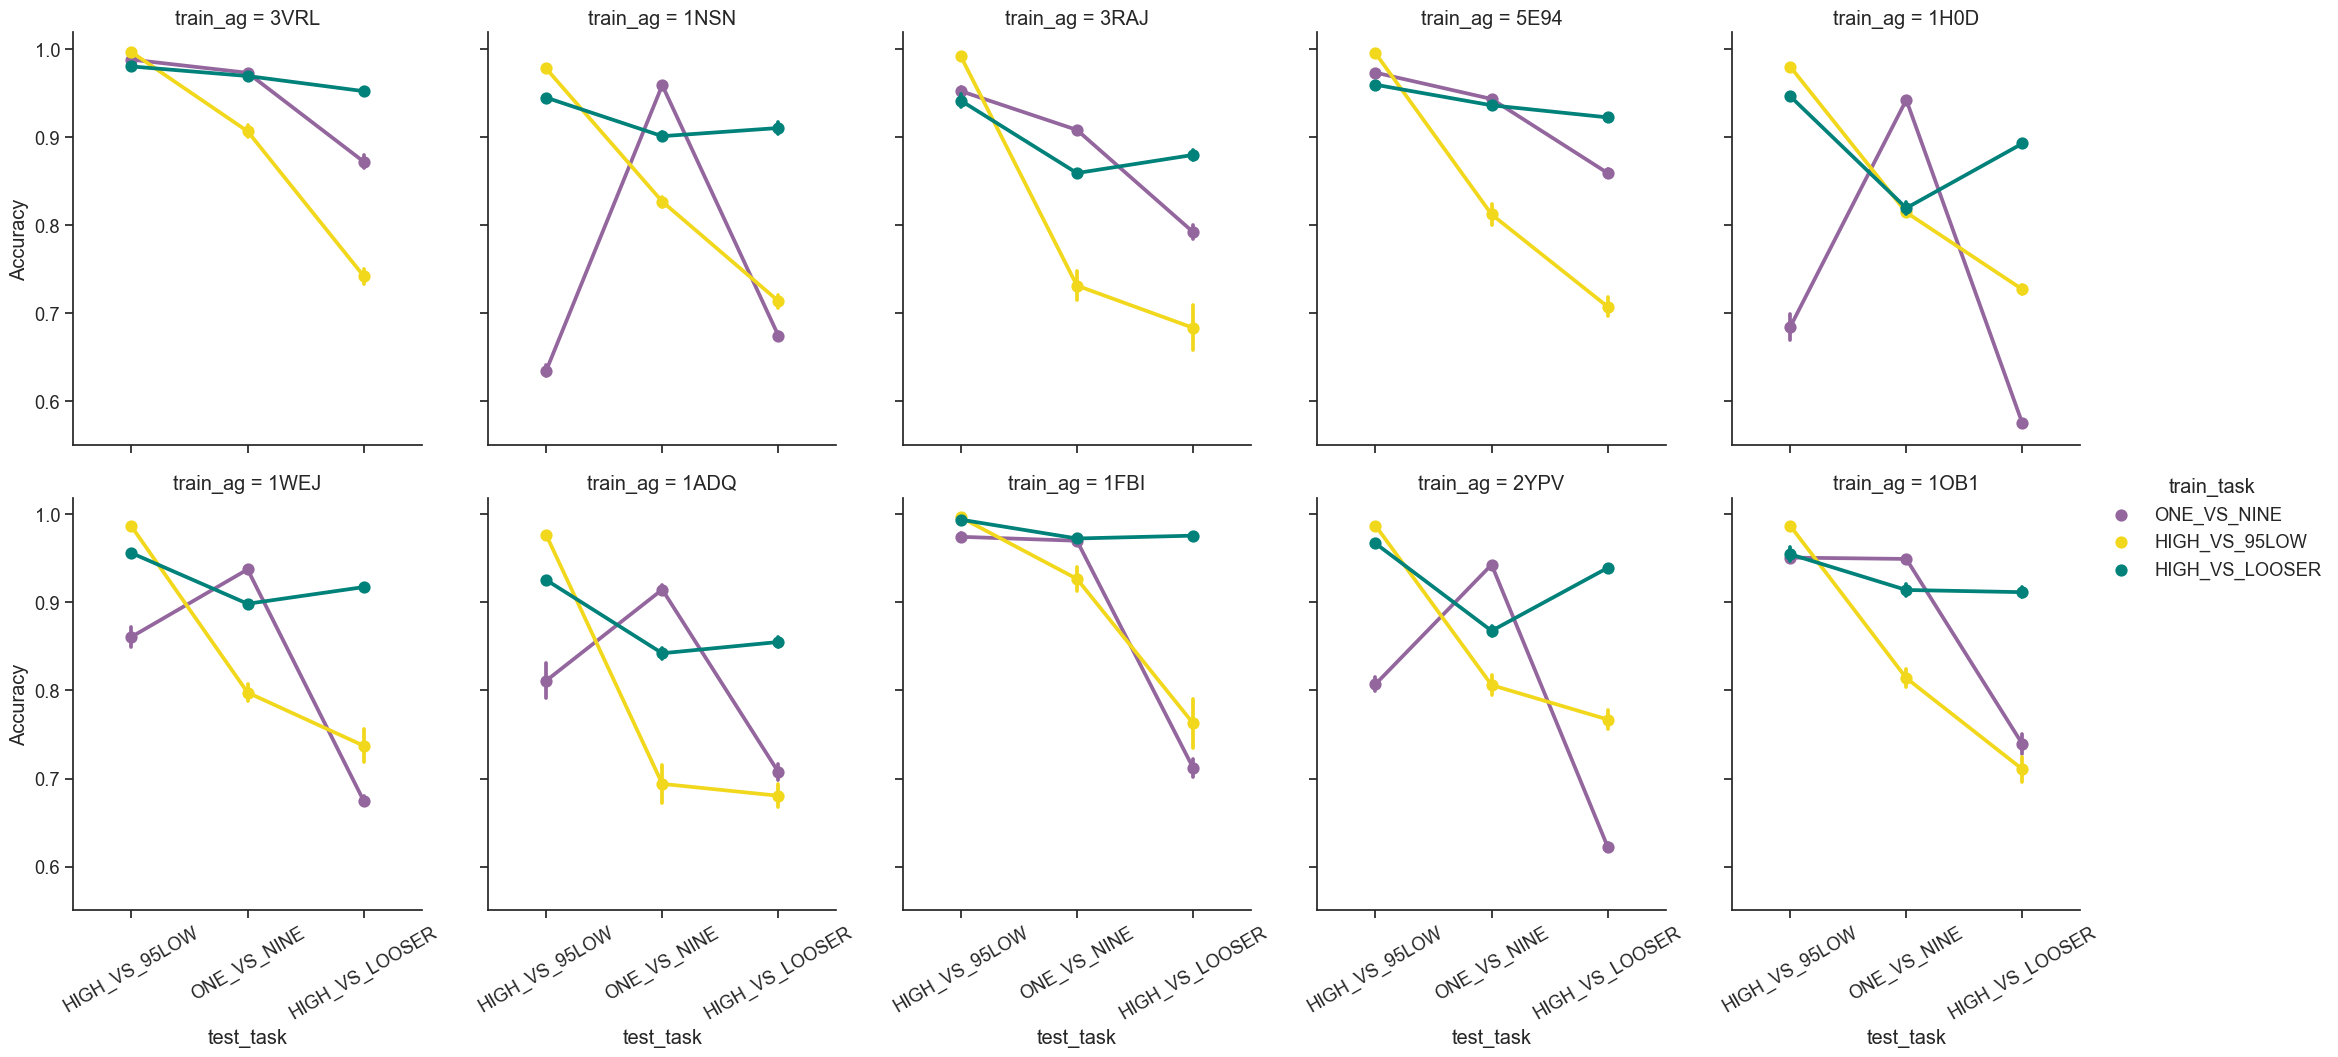

In [102]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set(font_scale=1.2)
sns.set_style('ticks')
g = sns.catplot(perf_df, x='test_task',  y='acc' , order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'], hue='train_task', col='train_ag', kind = 'point', errorbar= 'sd', aspect=0.85, palette = pellets['r_like'], col_wrap=5).set_xticklabels(rotation=30)
# change y axis label
g.set_ylabels('Accuracy')


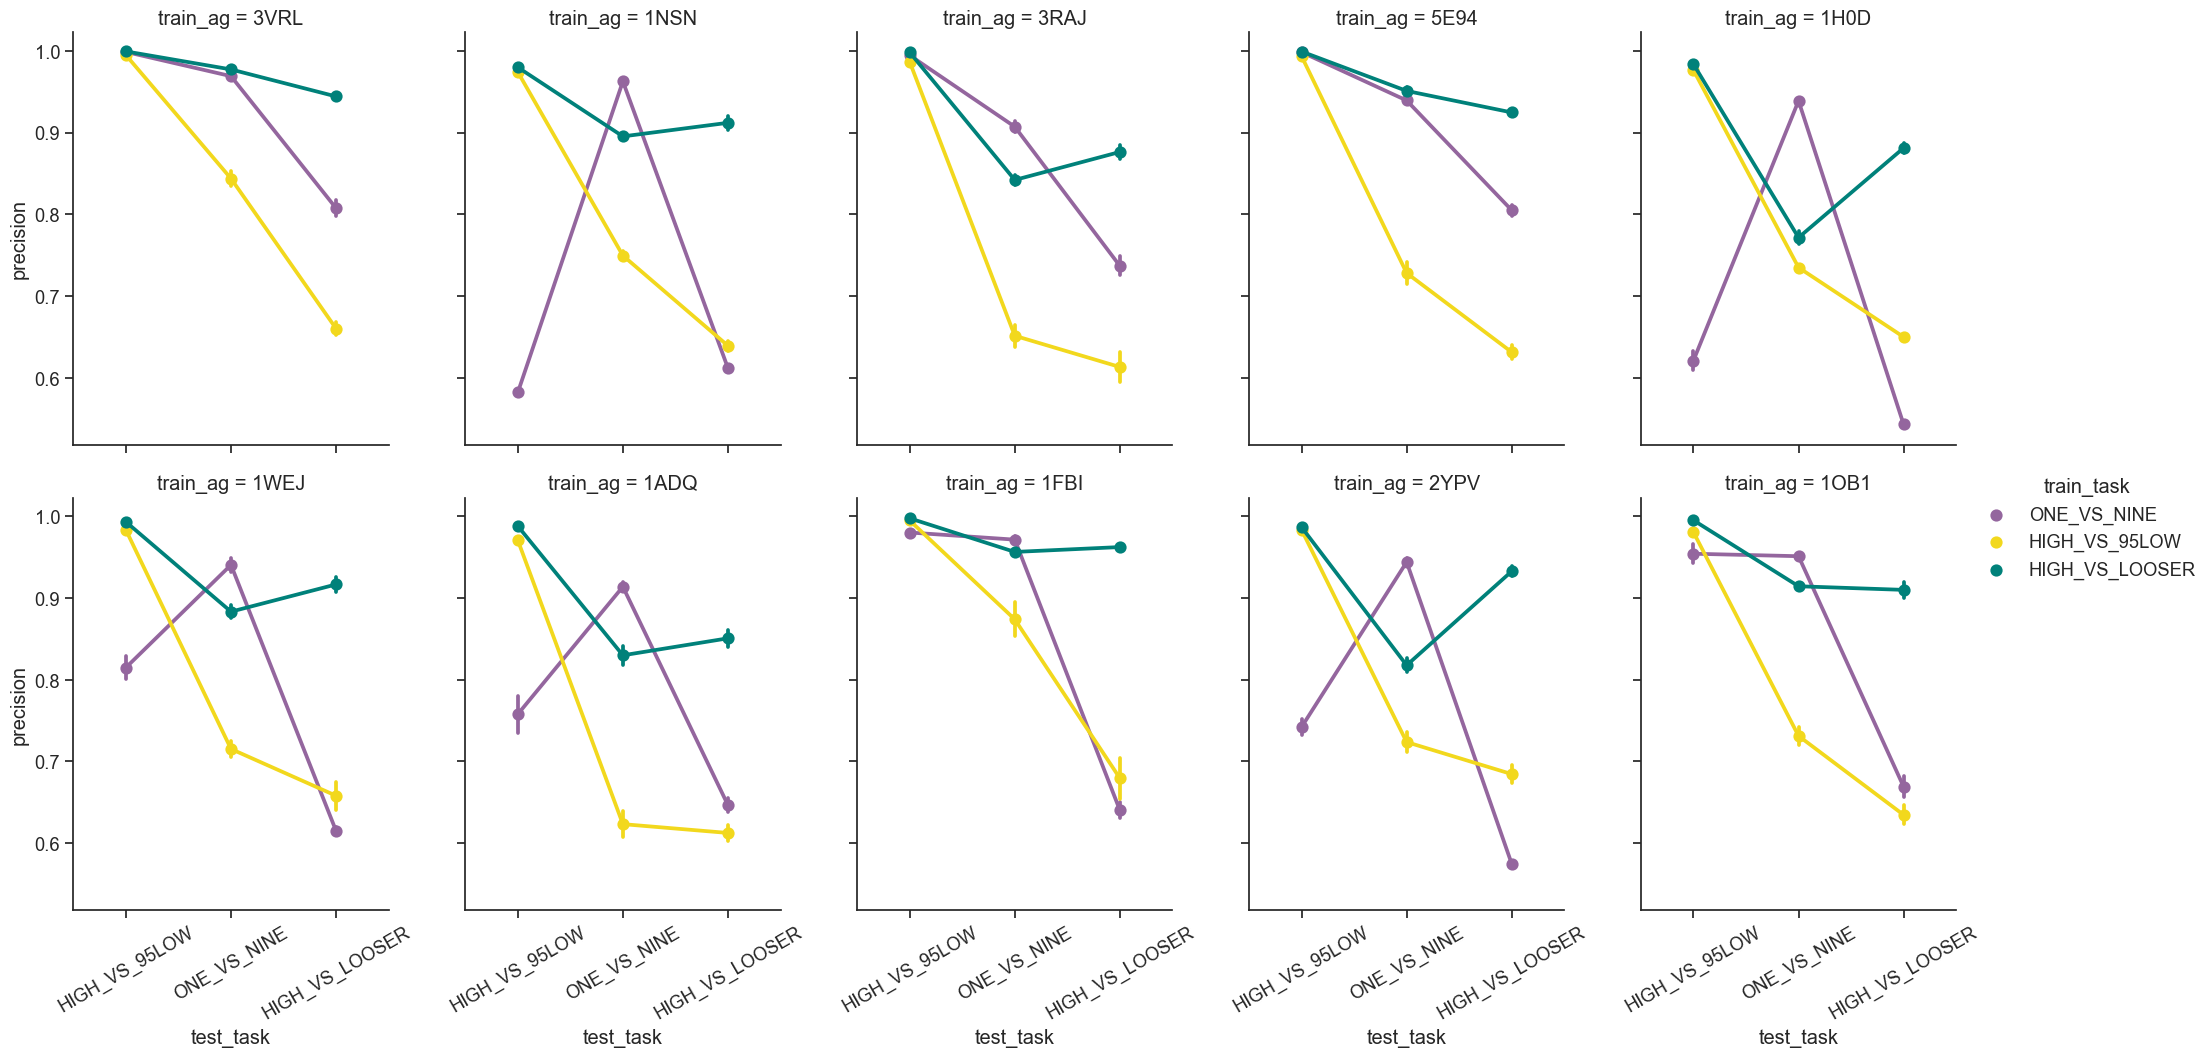

In [73]:
sns.catplot(perf_df, x='test_task', y='precision', order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'], hue='train_task', col='train_ag', kind = 'point', errorbar= 'sd', aspect=0.8, palette = pellets['r_like'], col_wrap=5).set_xticklabels(rotation=30)

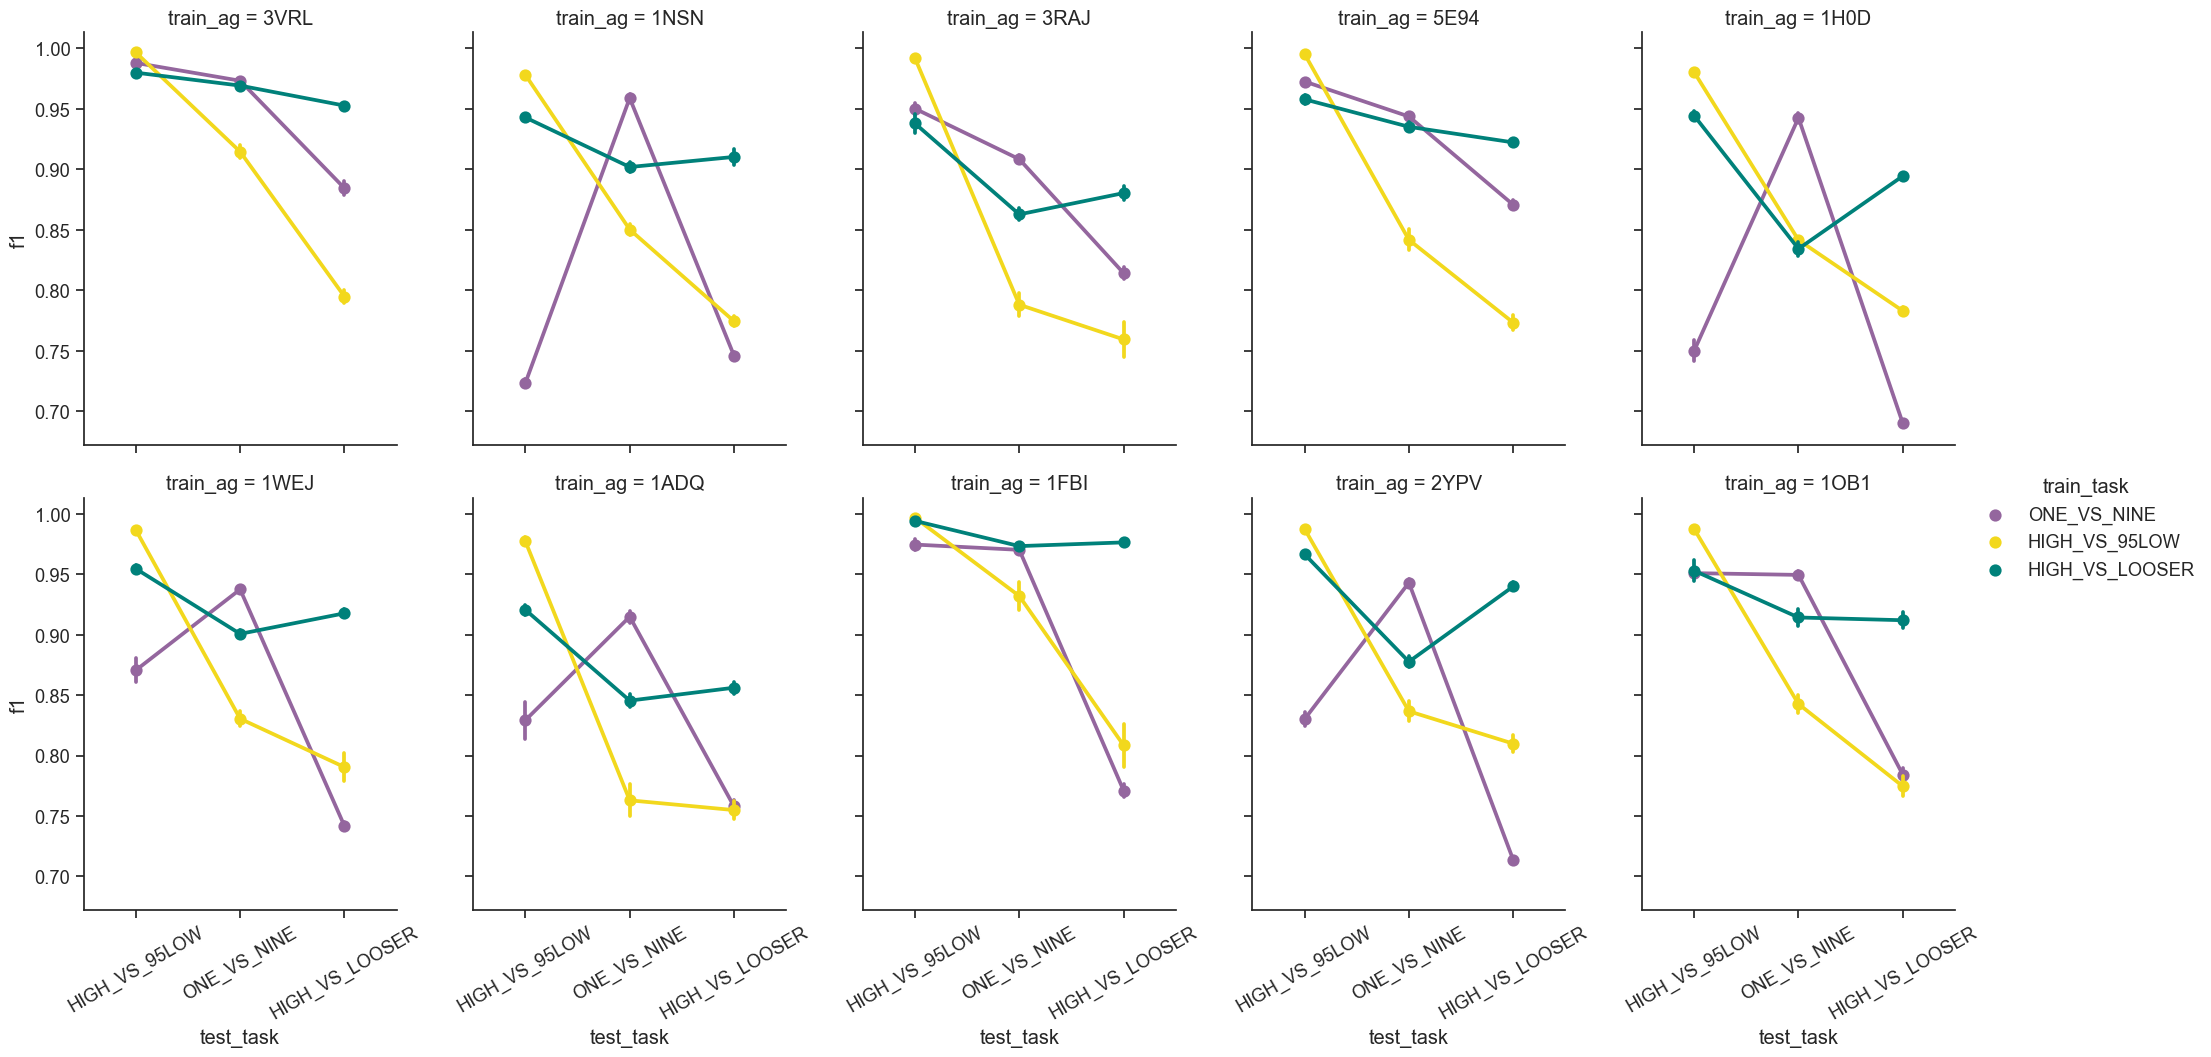

In [74]:
sns.catplot(perf_df, x='test_task', y='f1',order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'], hue='train_task', col='train_ag', kind = 'point', errorbar= 'sd', aspect=0.8, palette = pellets['r_like'], col_wrap=5).set_xticklabels(rotation=30)

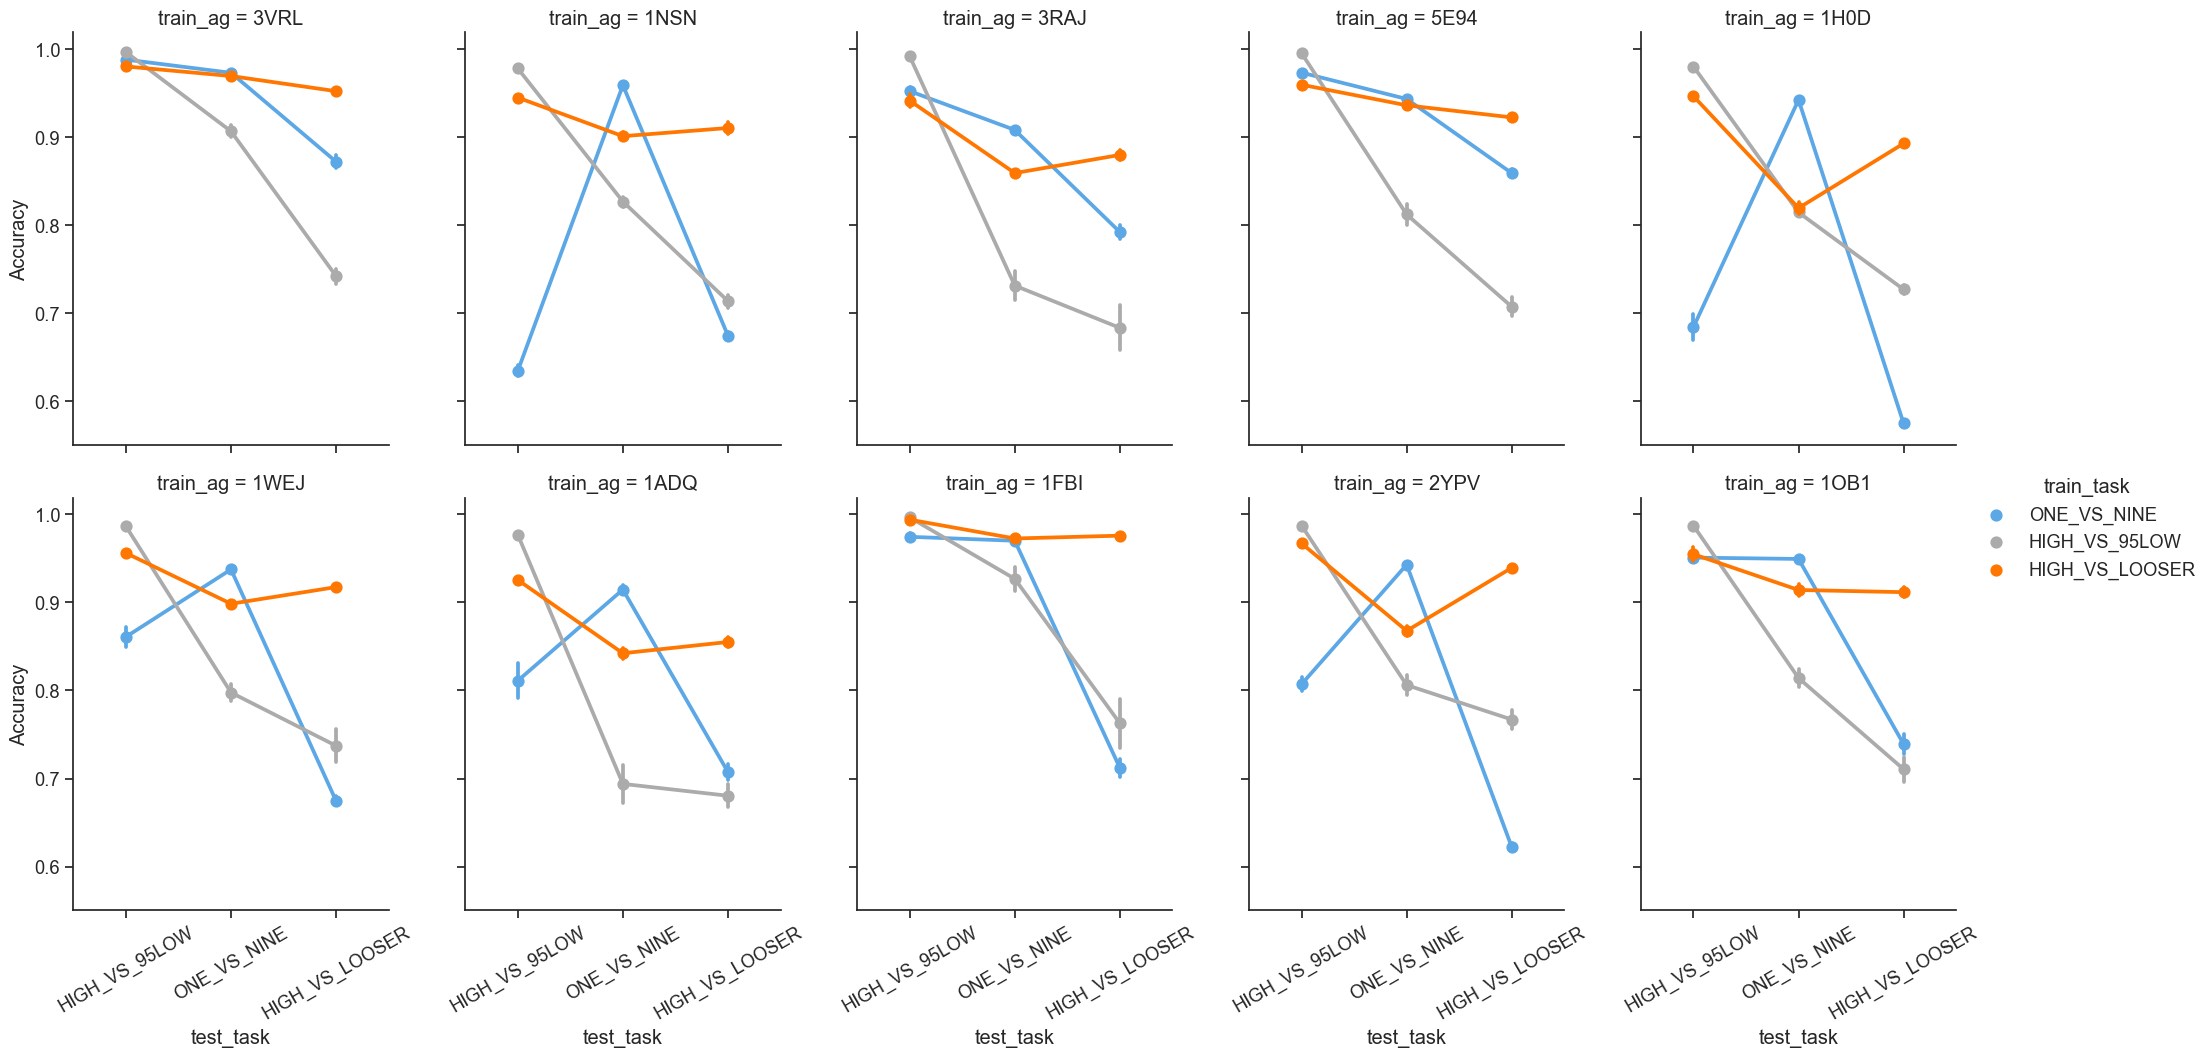

In [107]:
g_cb_dark = sns.catplot(perf_df, x='test_task', y='acc',order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'], hue='train_task', col='train_ag', kind = 'point', errorbar= 'sd', aspect=0.8, palette = pellets['color_blind_dark'], col_wrap=5).set_xticklabels(rotation=30)
g_cb_dark.set_ylabels('Accuracy')

In [53]:
config.ANTIGENS

['3VRL',
 '1NSN',
 '3RAJ',
 '5E94',
 '1H0D',
 '1WEJ',
 '1ADQ',
 '1FBI',
 '2YPV',
 '1OB1']

In [54]:
perf_df

,acc,recall,precision,f1,train_task,train_ag,train_neg,seed_id,split_id,test_task,test_ag,test_neg,test_seed_id,test_split_id
0,0.972986,0.9750,0.971116,0.973054,ONE_VS_NINE,3VRL,auto,0,42,ONE_VS_NINE,3VRL,auto,0,42
1,0.987000,0.9750,0.998975,0.986842,ONE_VS_NINE,3VRL,auto,0,42,HIGH_VS_95LOW,3VRL,auto,0,42
2,0.882900,0.9750,0.823341,0.892775,ONE_VS_NINE,3VRL,auto,0,42,HIGH_VS_LOOSER,3VRL,auto,0,42
3,0.912356,0.9980,0.852117,0.919307,HIGH_VS_95LOW,3VRL,auto,0,42,ONE_VS_NINE,3VRL,auto,0,42
4,0.996600,0.9980,0.995213,0.996605,HIGH_VS_95LOW,3VRL,auto,0,42,HIGH_VS_95LOW,3VRL,auto,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.988000,0.9946,0.981642,0.988079,HIGH_VS_95LOW,1OB1,auto,0,4,HIGH_VS_95LOW,1OB1,auto,0,4
806,0.720900,0.9946,0.642756,0.780875,HIGH_VS_95LOW,1OB1,auto,0,4,HIGH_VS_LOOSER,1OB1,auto,0,4
807,0.916558,0.9224,0.911823,0.917081,HIGH_VS_LOOSER,1OB1,auto,0,4,ONE_VS_NINE,1OB1,auto,0,4
808,0.959200,0.9224,0.995682,0.957641,HIGH_VS_LOOSER,1OB1,auto,0,4,HIGH_VS_95LOW,1OB1,auto,0,4


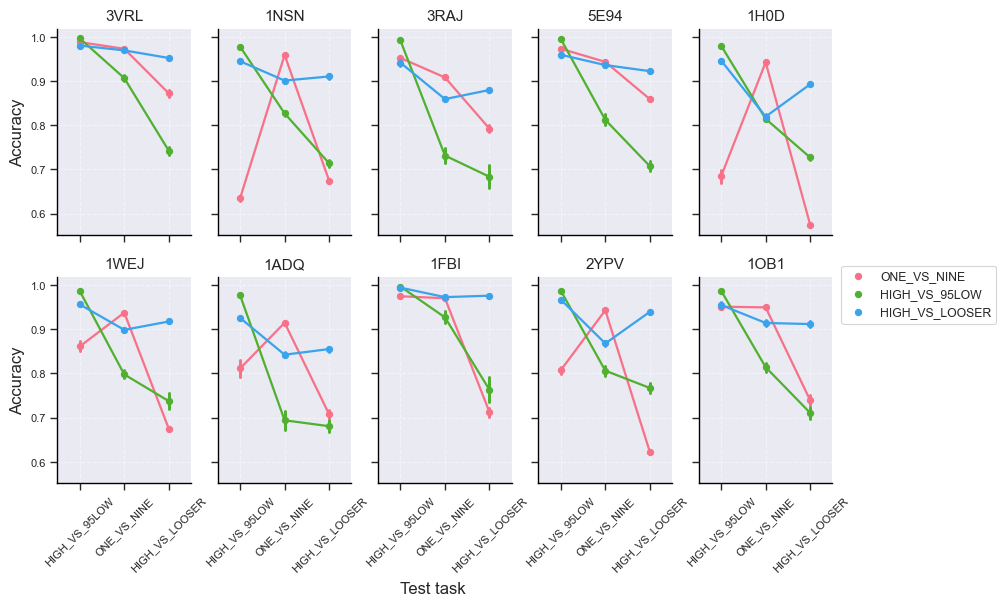

In [120]:
#Eugen style

sns.set_theme(context='paper')
fig, ax = plt.subplots(2,5,figsize=(10, 7), sharey=True, sharex=True)
sns.set_style('ticks')
# set font size
for i, ag in enumerate(config.ANTIGENS):
    r = i //5
    c = i % 5
    sns.pointplot(perf_df[perf_df['train_ag'] == ag], x='test_task', y='acc', order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'],  hue='train_task',  errorbar= 'sd',  palette = "husl", ax=ax[r,c], scale = 0.75)
    ax[r,c].legend().set_visible(False)
    ax[r,c].set_title(ag, fontsize=11)
    ax[r,c].set_ylabel('Accuracy', fontsize=12)
    #set grid x and y
    ax[r,c].grid(True, axis='x', linestyle='--', alpha=0.5)
    ax[r,c].grid(True, axis='y', linestyle='--', alpha=0.5)
    if c!=0:
       ax[r,c].set_ylabel('')
    #remove xlabel from all but the last row
    ax[r,c].set_xlabel('')
    #rotate xticks
    ax[r,c].set_xticklabels(ax[r,c].get_xticklabels(), rotation=45)  
    #set axeas and ticks visible
    ax[r,c].tick_params(axis='x', which='both', bottom=True, top=False)  
    ax[r,c].tick_params(axis='y', which='both', left=True, right=False)
    #set y axes black visible
    ax[r,c].spines['left'].set_color('black')
    ax[r,c].spines['bottom'].set_color('black')
    ax[r,c].spines['right'].set_visible(False)
    ax[r,c].spines['top'].set_visible(False)
    #set font size
    ax[r,c].tick_params(axis='both', which='major', labelsize=8)
    

# set common y axis label
fig.text(0.5, 0.08, 'Test task', ha='center', va='center', fontsize=12)

#one legend for all subplots
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='right', ncol=1, bbox_to_anchor=(1.07, 0.5))
#tight layout but fitting the legend
plt.subplots_adjust(bottom=0.23)
#plt.tight_layout()



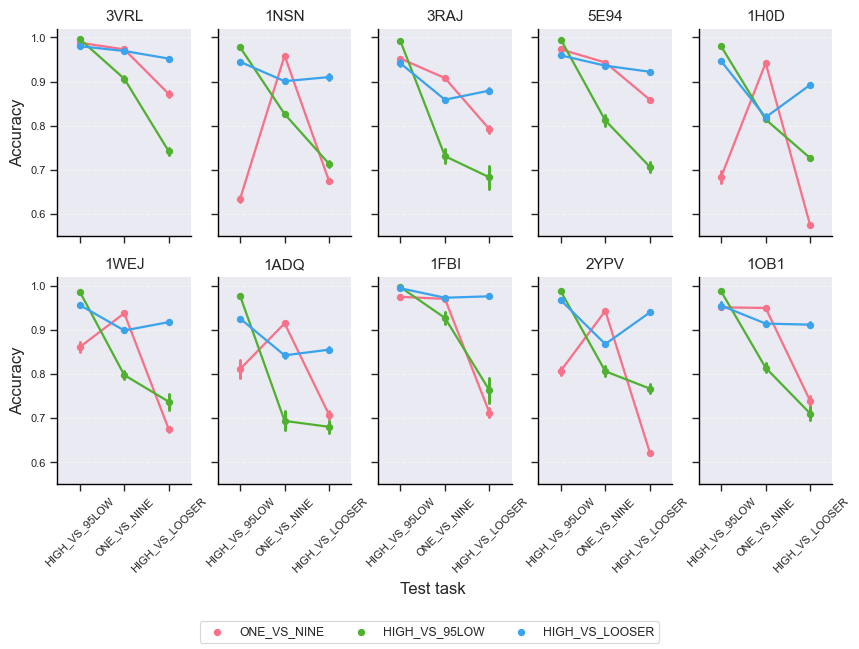

In [95]:
#Eugen style

sns.set_theme(context='paper')
fig, ax = plt.subplots(2,5,figsize=(10, 7), sharey=True, sharex=True)
sns.set_style('ticks')
# set font size
for i, ag in enumerate(config.ANTIGENS):
    r = i //5
    c = i % 5
    sns.pointplot(perf_df[perf_df['train_ag'] == ag], x='test_task', y='acc', order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'],  hue='train_task',  errorbar= 'sd',  palette = "husl", ax=ax[r,c], scale = 0.75)
    ax[r,c].legend().set_visible(False)
    ax[r,c].set_title(ag, fontsize=11)
    ax[r,c].set_ylabel('Accuracy', fontsize=12)
    #set grid x and y
    #ax[r,c].grid(True, axis='x', linestyle='--', alpha=0.5)
    ax[r,c].grid(True, axis='y', linestyle='--', alpha=0.5)
    if c!=0:
       ax[r,c].set_ylabel('')
    #remove xlabel from all but the last row
    ax[r,c].set_xlabel('')
    #rotate xticks
    ax[r,c].set_xticklabels(ax[r,c].get_xticklabels(), rotation=45)  
    #set axeas and ticks visible
    ax[r,c].tick_params(axis='x', which='both', bottom=True, top=False)  
    ax[r,c].tick_params(axis='y', which='both', left=True, right=False)
    #set y axes black visible
    ax[r,c].spines['left'].set_color('black')
    ax[r,c].spines['bottom'].set_color('black')
    ax[r,c].spines['right'].set_visible(False)
    ax[r,c].spines['top'].set_visible(False)
    #set font size
    ax[r,c].tick_params(axis='both', which='major', labelsize=8)
    

# set common y axis label
fig.text(0.5, 0.08, 'Test task', ha='center', va='center', fontsize=12)

#one legend for all subplots
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)
#tight layout but fitting the legend
plt.subplots_adjust(bottom=0.23)
#plt.tight_layout()



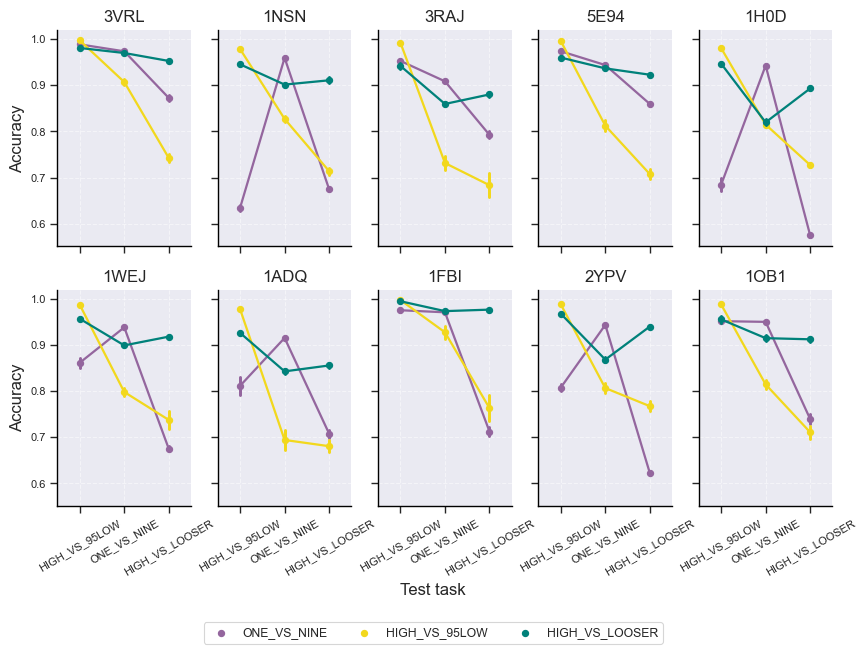

In [99]:
#Eugen style

sns.set_theme(context='paper')
fig, ax = plt.subplots(2,5,figsize=(10, 7), sharey=True, sharex=True)
sns.set_style('ticks')
# set font size
for i, ag in enumerate(config.ANTIGENS):
    r = i //5
    c = i % 5
    sns.pointplot(perf_df[perf_df['train_ag'] == ag], x='test_task', y='acc', order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'],  hue='train_task',  errorbar= 'sd',  palette = pellets['r_like'], ax=ax[r,c], scale=0.75)
    ax[r,c].legend().set_visible(False)
    ax[r,c].set_title(ag, fontsize=12)
    ax[r,c].set_ylabel('Accuracy', fontsize=12)
    #set grid x and y
    ax[r,c].grid(True, axis='x', linestyle='--', alpha=0.5)
    ax[r,c].grid(True, axis='y', linestyle='--', alpha=0.5)
    if c!=0:
       ax[r,c].set_ylabel('')
    #removw xlabel from all but the last row
    ax[r,c].set_xlabel('')
    #rotate xticks
    ax[r,c].set_xticklabels(ax[r,c].get_xticklabels(), rotation=30)  
    #set axeas and ticks visible
    ax[r,c].tick_params(axis='x', which='both', bottom=True, top=False)  
    ax[r,c].tick_params(axis='y', which='both', left=True, right=False)
    #set y axes black visible
    ax[r,c].spines['left'].set_color('black')
    ax[r,c].spines['bottom'].set_color('black')
    ax[r,c].spines['right'].set_visible(False)
    ax[r,c].spines['top'].set_visible(False)
    #set font size
    ax[r,c].tick_params(axis='both', which='major', labelsize=8)
    #remove x axis labels


    

# set common y axis label
fig.text(0.5, 0.08, 'Test task', ha='center', va='center', fontsize=12)

#one legend for all subplots
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)
#tight layout but fitting the legend
plt.subplots_adjust(bottom=0.2)
#plt.tight_layout()



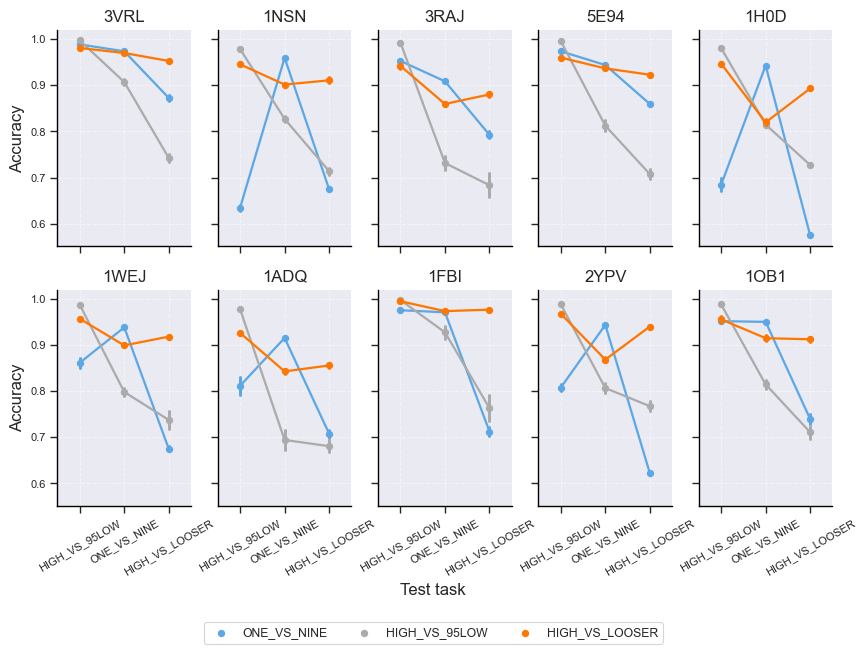

In [98]:
#Eugen style

sns.set_theme(context='paper')
fig, ax = plt.subplots(2,5,figsize=(10, 7), sharey=True, sharex=True)
sns.set_style('ticks')
# set font size
for i, ag in enumerate(config.ANTIGENS):
    r = i //5
    c = i % 5
    sns.pointplot(perf_df[perf_df['train_ag'] == ag], x='test_task', y='acc', order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'],  hue='train_task',  errorbar= 'sd',  palette = pellets['color_blind_dark'], ax=ax[r,c], scale=0.75)
    ax[r,c].legend().set_visible(False)
    ax[r,c].set_title(ag, fontsize=12)
    ax[r,c].set_ylabel('Accuracy', fontsize=12)
    #set grid x and y
    ax[r,c].grid(True, axis='x', linestyle='--', alpha=0.5)
    ax[r,c].grid(True, axis='y', linestyle='--', alpha=0.5)
    if c!=0:
       ax[r,c].set_ylabel('')
    #removw xlabel from all but the last row
    ax[r,c].set_xlabel('')
    #rotate xticks
    ax[r,c].set_xticklabels(ax[r,c].get_xticklabels(), rotation=30)  
    #set axeas and ticks visible
    ax[r,c].tick_params(axis='x', which='both', bottom=True, top=False)  
    ax[r,c].tick_params(axis='y', which='both', left=True, right=False)
    #set y axes black visible
    ax[r,c].spines['left'].set_color('black')
    ax[r,c].spines['bottom'].set_color('black')
    ax[r,c].spines['right'].set_visible(False)
    ax[r,c].spines['top'].set_visible(False)
    #set font size
    ax[r,c].tick_params(axis='both', which='major', labelsize=8)
    #remove x axis labels


    

# set common y axis label
fig.text(0.5, 0.08, 'Test task', ha='center', va='center', fontsize=12)

#one legend for all subplots
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)
#tight layout but fitting the legend
plt.subplots_adjust(bottom=0.2)
#plt.tight_layout()



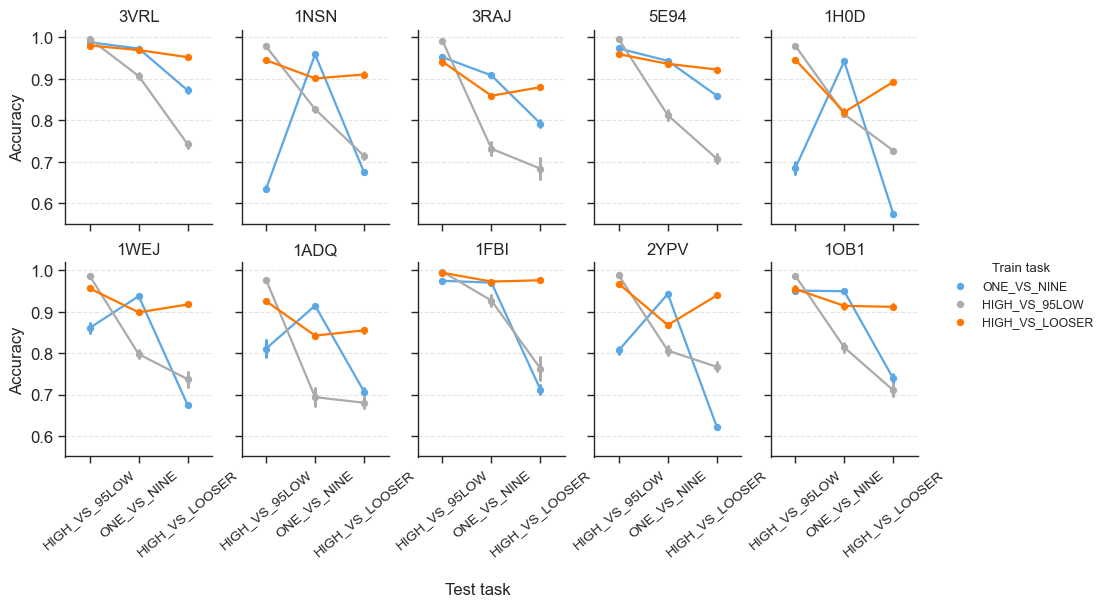

In [169]:
#Eugen style


fig, ax = plt.subplots(2,5,figsize=(11, 7), sharey=True, sharex=True)
sns.set_style('ticks')
# set font size
for i, ag in enumerate(config.ANTIGENS):
    r = i //5
    c = i % 5
    sns.pointplot(perf_df[perf_df['train_ag'] == ag], x='test_task', y='acc', order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'],  hue='train_task',  errorbar= 'sd',  palette = pellets['color_blind_dark'], ax=ax[r,c], scale=0.75)
    ax[r,c].legend().set_visible(False)
    ax[r,c].set_title(ag, fontsize=12)
    ax[r,c].set_ylabel('Accuracy', fontsize=12)
    
    ax[r,c].grid(True, axis='y', linestyle='--', alpha=0.5)
    #y axis label size
    ax[r,c].yaxis.label.set_size(12)

    if c!=0:
       ax[r,c].set_ylabel('')
    #removw xlabel from all but the last row
    ax[r,c].set_xlabel('')
    #rotate xticks
    ax[r,c].set_xticklabels(ax[r,c].get_xticklabels(), rotation=40)  

   
    ax[r,c].tick_params(axis='x', which='major', labelsize= 10)
    ax[r,c].tick_params(axis='y', which='major', labelsize= 12)
    #REMOVE upper and right spines
    ax[r,c].spines['right'].set_visible(False)
    ax[r,c].spines['top'].set_visible(False)



# set common y axis label
fig.text(0.5, 0.08, 'Test task', ha='center', va='center', fontsize=12)

#one legend for all subplots
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='right', ncol=1, bbox_to_anchor=(1.07, 0.5), title='Train task', frameon=False)
#tight layout but fitting the legend
plt.subplots_adjust(bottom=0.27)
#plt.tight_layout()



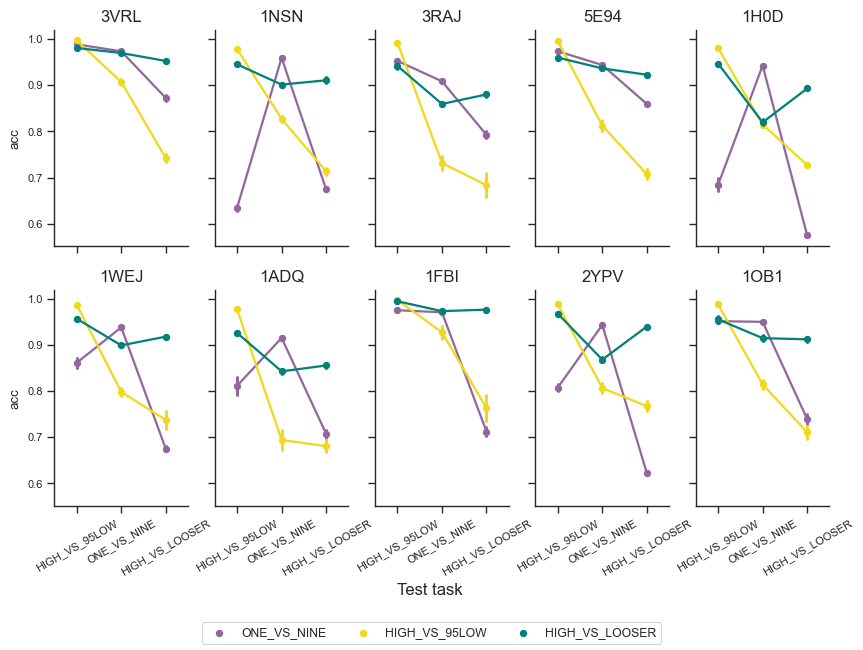

In [89]:
#Eugen style


fig, ax = plt.subplots(2,5,figsize=(10, 7), sharey=True, sharex=True)
sns.set_style('ticks')
# set font size
for i, ag in enumerate(config.ANTIGENS):
    r = i //5
    c = i % 5
    sns.pointplot(perf_df[perf_df['train_ag'] == ag], x='test_task', y='acc', order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'],  hue='train_task',  errorbar= 'sd',  palette = pellets['r_like'], ax=ax[r,c], scale=0.75)
    ax[r,c].legend().set_visible(False)
    ax[r,c].set_title(ag, fontsize=12)

    if c!=0:
       ax[r,c].set_ylabel('')
    #removw xlabel from all but the last row
    ax[r,c].set_xlabel('')
    #rotate xticks
    ax[r,c].set_xticklabels(ax[r,c].get_xticklabels(), rotation=30)  

    #set font size
    ax[r,c].tick_params(axis='both', which='major', labelsize=8)
    #REMOVE upper and right spines
    ax[r,c].spines['right'].set_visible(False)
    ax[r,c].spines['top'].set_visible(False)


# set common y axis label
fig.text(0.5, 0.08, 'Test task', ha='center', va='center', fontsize=12)

#one legend for all subplots
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)
#tight layout but fitting the legend
plt.subplots_adjust(bottom=0.2)
#plt.tight_layout()



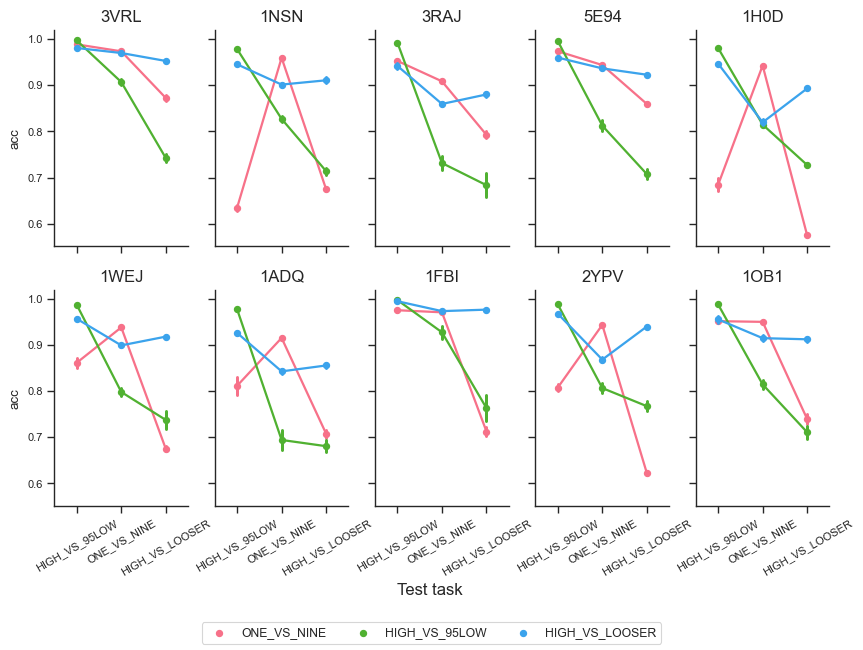

In [90]:
#Eugen style


fig, ax = plt.subplots(2,5,figsize=(10, 7), sharey=True, sharex=True)
sns.set_style('ticks')
# set font size
for i, ag in enumerate(config.ANTIGENS):
    r = i //5
    c = i % 5
    sns.pointplot(perf_df[perf_df['train_ag'] == ag], x='test_task', y='acc', order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'],  hue='train_task',  errorbar= 'sd',  palette ='husl', ax=ax[r,c], scale=0.75)
    ax[r,c].legend().set_visible(False)
    ax[r,c].set_title(ag, fontsize=12)

    if c!=0:
       ax[r,c].set_ylabel('')
    #removw xlabel from all but the last row
    ax[r,c].set_xlabel('')
    #rotate xticks
    ax[r,c].set_xticklabels(ax[r,c].get_xticklabels(), rotation=30)  

    #set font size
    ax[r,c].tick_params(axis='both', which='major', labelsize=8)
    #REMOVE upper and right spines
    ax[r,c].spines['right'].set_visible(False)
    ax[r,c].spines['top'].set_visible(False)


# set common y axis label
fig.text(0.5, 0.08, 'Test task', ha='center', va='center', fontsize=12)

#one legend for all subplots
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)
#tight layout but fitting the legend
plt.subplots_adjust(bottom=0.2)
#plt.tight_layout()



In [59]:
g_rlike.savefig('openset_performance_by_ag_rlike.pdf')
g_cb_dark.savefig('openset_performance_by_ag_cblind_dark.pdf')
g_cb_light.savefig('openset_performance_by_ag_cblind_light.pdf')

NameError: name 'g_rlike' is not defined

In [61]:
perf_means = perf_df.groupby(['train_task','test_task']).mean().reset_index()

In [62]:
def get_closed_mean(task, metric):
    closed_mean = perf_means[(perf_means['train_task'] == task) & (perf_means['test_task'] == task)][metric].values[0]
    return closed_mean

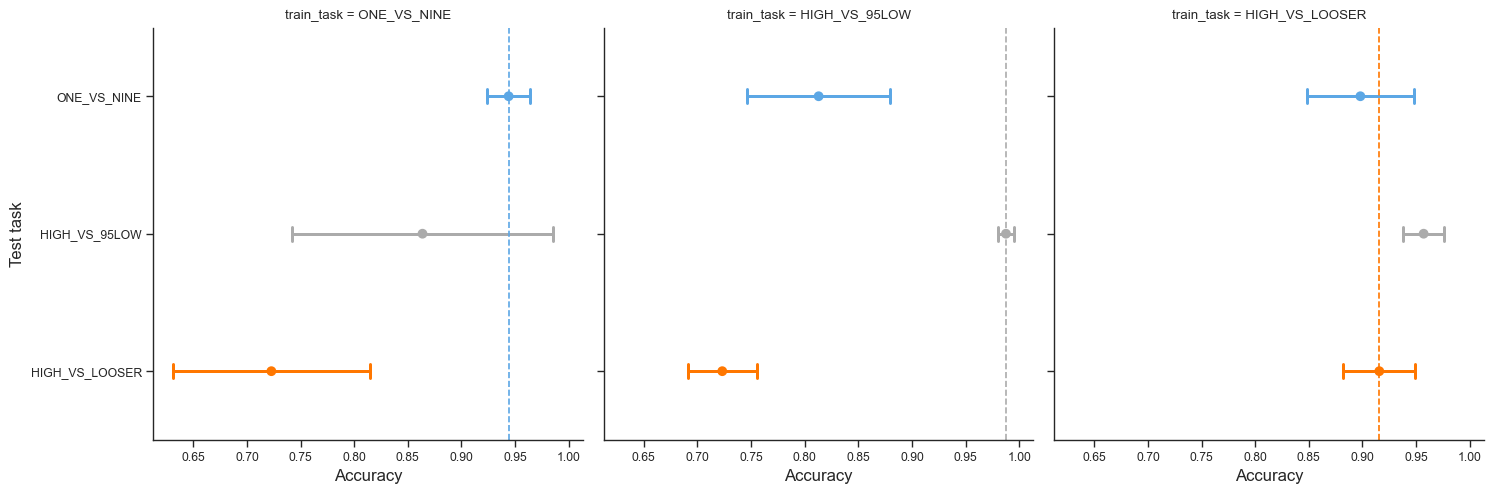

In [229]:
g_open_set_ag_agnostic = sns.catplot(perf_df, kind = 'point', errorbar= 'sd', join=False, capsize=.1, x = 'acc', y = 'test_task', col = 'train_task', palette = pellets['color_blind_dark'], legend = True)
axs = g_open_set_ag_agnostic.axes[0]
axs[0].axvline(get_closed_mean('ONE_VS_NINE', 'acc') ,ls='--', color=pellets['color_blind_dark'][0])
axs[1].axvline(get_closed_mean('HIGH_VS_95LOW', 'acc') ,ls='--', color=pellets['color_blind_dark'][1])
axs[2].axvline(get_closed_mean('HIGH_VS_LOOSER', 'acc') ,ls='--', color=pellets['color_blind_dark'][2])
#set y label
g_open_set_ag_agnostic.set_ylabels('Test task', fontsize=12)
#set x label
g_open_set_ag_agnostic.set_xlabels('Accuracy', fontsize=12)
#'r_like':['#94669E', '#F2D81D', '#00817A']}

In [178]:
tasks = ['ONE_VS_NINE', 'HIGH_VS_95LOW', 'HIGH_VS_LOOSER']

Text(0.5, 0, 'Accuracy')

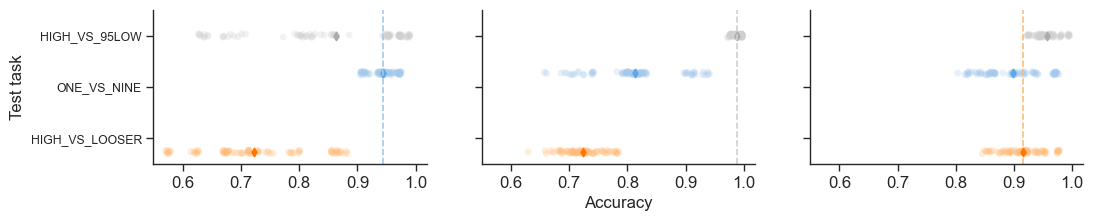

In [236]:
fig, ax = plt.subplots(1,3,figsize=(12, 2), sharey=True, sharex=True)
sns.set_style('ticks')
# set font size
for i, task in enumerate(tasks):
    sns.stripplot(
    perf_df[perf_df['train_task']== task], x = 'acc', y = 'test_task', hue="test_task",order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'], dodge=True, alpha=.25, zorder=1, legend=False, ax=ax[i], palette = pellets['color_blind_light'])

    ax[i].spines['left'].set_visible(True)
    ax[i].spines['bottom'].set_visible(True)

    sns.pointplot(
    perf_df[perf_df['train_task']==task],  x = 'acc', y = 'test_task', hue="test_task", order = ['HIGH_VS_95LOW', 'ONE_VS_NINE', 'HIGH_VS_LOOSER'], join=False, dodge=.8 - .8 / 3, palette=pellets['color_blind_dark'],
    markers="d", scale=.75, errorbar=None, ax=ax[i])
    #remove legend
    ax[i].legend().set_visible(False)

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    ax[i].axvline(get_closed_mean(task, 'acc') ,ls='--', color=pellets['color_blind_light'][i])
    ax[i].tick_params(axis='x', which='major', labelsize=12)
    #remove x label
    ax[i].set_xlabel('')
ax[0].set_ylabel('Test task', fontsize=12)
#set x label
ax[1].set_xlabel('Accuracy', fontsize=12)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Accuracy')

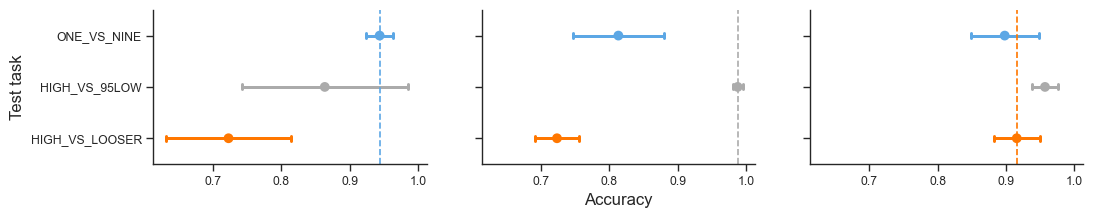

In [245]:
fig, ax = plt.subplots(1,3,figsize=(12, 2), sharey=True, sharex=True)
sns.set_style('ticks')
# set font size
for i, task in enumerate(tasks):
    sns.pointplot(perf_df[perf_df['train_task']== task], errorbar= 'sd', capsize=.1, x = 'acc', y = 'test_task', palette = pellets['color_blind_dark'], ax=ax[i])

    ax[i].spines['left'].set_visible(True)
    ax[i].spines['bottom'].set_visible(True)

    ax[i].legend().set_visible(False)

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    ax[i].axvline(get_closed_mean(task, 'acc') ,ls='--', color=pellets['color_blind_dark'][i])
    #remove label from all
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    
ax[0].set_ylabel('Test task', fontsize=12)
#set x label
ax[1].set_xlabel('Accuracy', fontsize=12)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Accuracy')

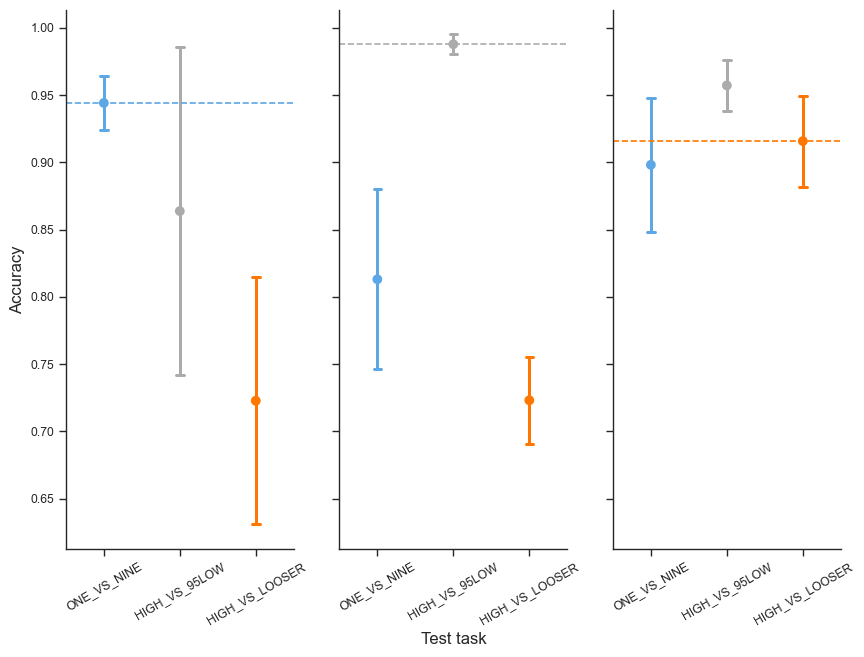

In [256]:
fig, ax = plt.subplots(1,3,figsize=(10,7), sharey=True, sharex=True)
sns.set_style('ticks')
# set font size
for i, task in enumerate(tasks):
    sns.pointplot(perf_df[perf_df['train_task']== task], errorbar= 'sd', capsize=.1, y= 'acc', x = 'test_task', palette = pellets['color_blind_dark'], ax=ax[i])

    ax[i].spines['left'].set_visible(True)
    ax[i].spines['bottom'].set_visible(True)

    ax[i].legend().set_visible(False)

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    ax[i].axhline(get_closed_mean(task, 'acc') ,ls='--', color=pellets['color_blind_dark'][i])
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)  

ax[1].set_xlabel('Test task', fontsize=12)
#set x label
ax[0].set_ylabel('Accuracy', fontsize=12)


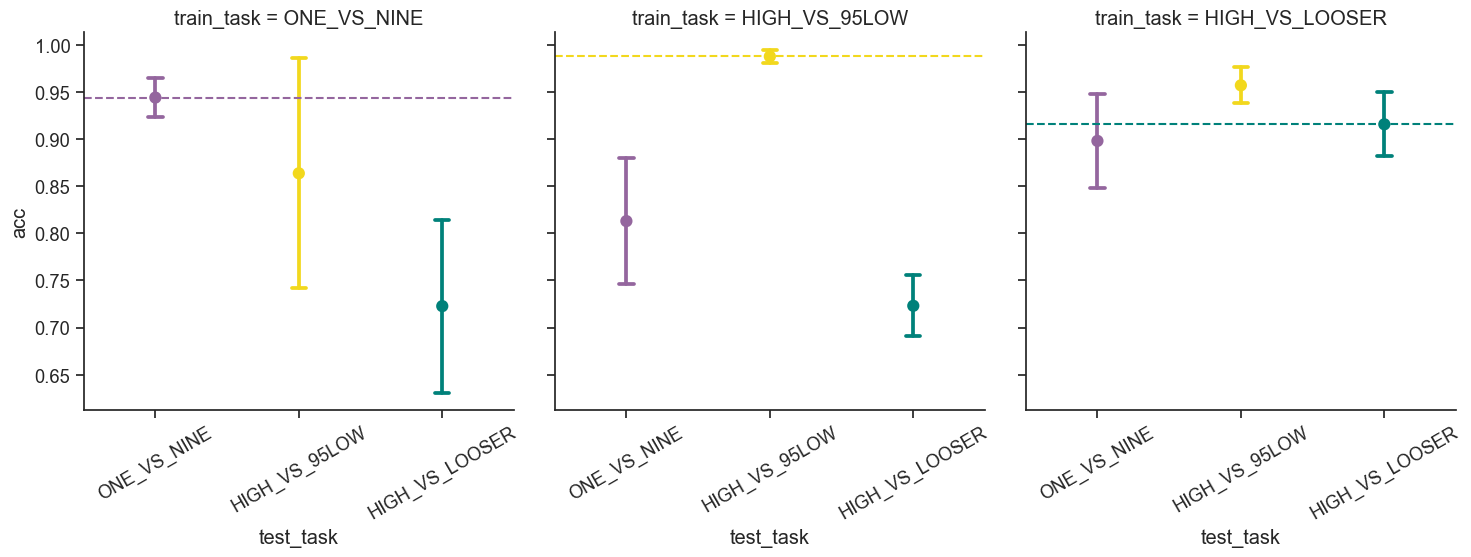

In [65]:
g_open_set_ag_agnostic = sns.catplot(perf_df, kind = 'point', errorbar= 'sd', join=False, capsize=.1, y = 'acc', x = 'test_task', col = 'train_task', palette = pellets['r_like'], legend = True).set_xticklabels(rotation=30)
axs = g_open_set_ag_agnostic.axes[0]
axs[0].axhline(get_closed_mean('ONE_VS_NINE', 'acc') ,ls='--', color='#94669E')
axs[1].axhline(get_closed_mean('HIGH_VS_95LOW', 'acc') ,ls='--', color='#F2D81D')
axs[2].axhline(get_closed_mean('HIGH_VS_LOOSER', 'acc') ,ls='--', color='#00817A')
#'r_like':['#94669E', '#F2D81D', '#00817A']}

In [ ]:
#grid interfere with a trend
#color is not color blind friendly

In [ ]:
g_open_set_ag_agnostic = sns.catplot(perf_df, kind = 'point', errorbar= 'sd', join=False, capsize=.1, x = 'acc', y = 'test_task', col = 'train_task', palette = pellets['r_like'], legend = True)
axs = g_open_set_ag_agnostic.axes[0]
axs[0].axvline(get_closed_mean('ONE_VS_NINE', 'acc') ,ls='--', color='#94669E')
axs[1].axvline(get_closed_mean('HIGH_VS_95LOW', 'acc') ,ls='--', color='#F2D81D')
axs[2].axvline(get_closed_mean('HIGH_VS_LOOSER', 'acc') ,ls='--', color='#00817A')

In [147]:
g_open_set_ag_agnostic.savefig('openset_performance_by_task_rlike.png')